In [19]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

In [21]:
x=pd.read_excel("data.xlsx")
data=x["knowledge"]
data

0          Data
1          Data
2      CRISP_DM
3      CRISP_DM
4      CRISP_DM
         ...   
320       Scale
321       Scale
322       Scipy
323       Scipy
324       Scipy
Name: knowledge, Length: 325, dtype: object

In [22]:
comment_words = ' '  
# iterate through the csv file 
for val in data: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '

In [23]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [24]:
fname = 'dist.png'
image = Image.open(fname).convert("L")
mask = np.asarray(image)
# Transform your mask into a new one that will work with the function:
transformed_wine_mask = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)

for i in range(len(mask)):
    transformed_wine_mask[i] = list(map(transform_format, mask[i]))

In [25]:
# Check the expected result of your mask
transformed_wine_mask

array([[255, 141, 138, ..., 138, 136, 255],
       [170, 135, 134, ..., 134, 134, 136],
       [159, 134, 171, ..., 202, 134, 134],
       ...,
       [159, 134, 175, ..., 211, 134, 134],
       [191, 135, 134, ..., 134, 134, 136],
       [255, 139, 136, ..., 136, 137, 146]], dtype=int32)

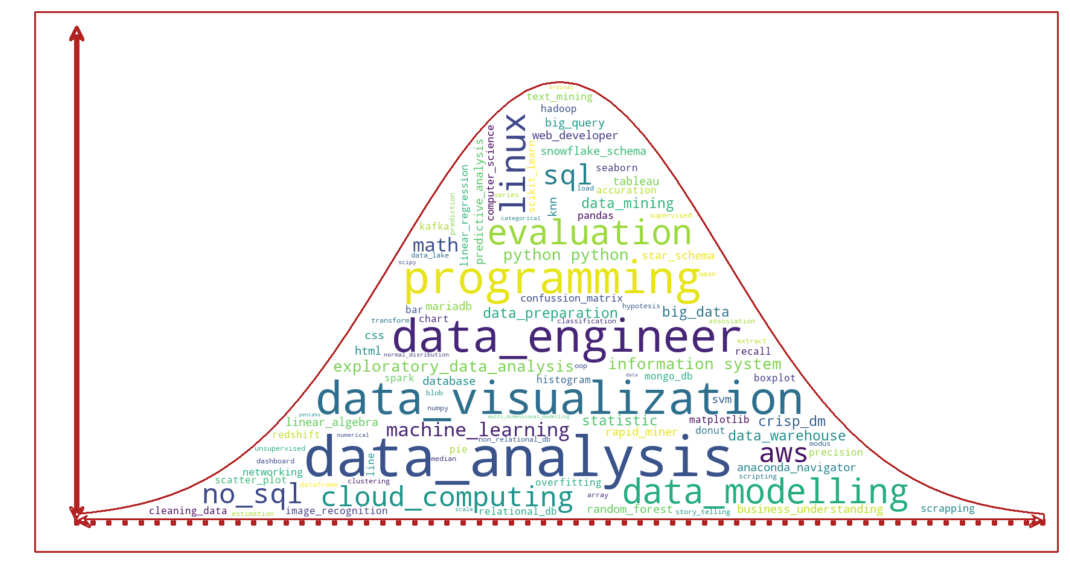

In [26]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_wine_mask,
               contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(comment_words)

# store to file
wc.to_file("wine.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

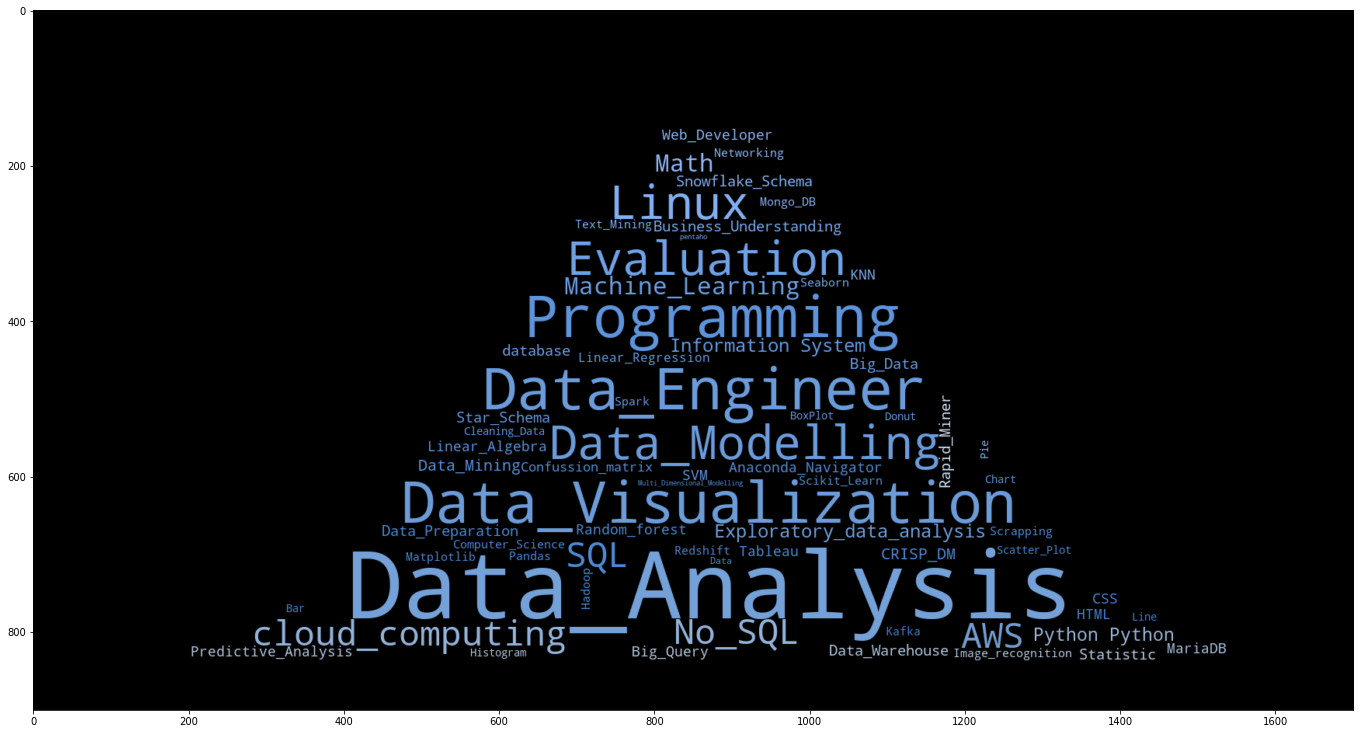

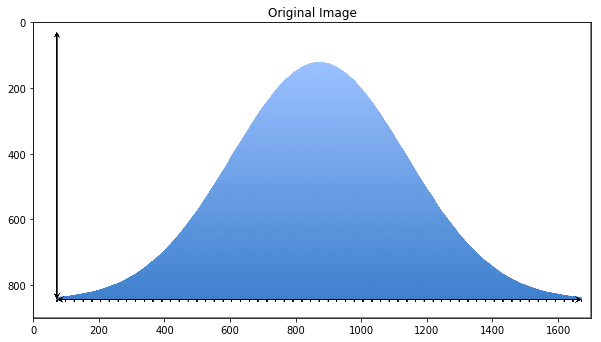

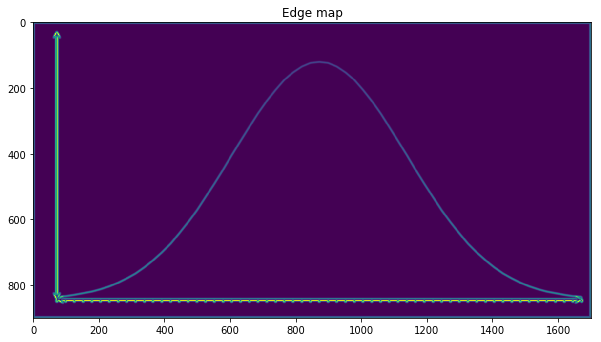

In [13]:
import os
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_gradient_magnitude

from wordcloud import WordCloud, ImageColorGenerator

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = os.path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# load wikipedia text on rainbow
text = open(os.path.join(d, 'knowledge')).read()

# load image. This has been modified in gimp to be brighter and have more saturation.
parrot_color = np.array(Image.open(os.path.join(d, "dist.png")))
# subsample by factor of 3. Very lossy but for a wordcloud we don't really care.
# parrot_color = parrot_color[::3, ::3]

# create mask  white is "masked out"
parrot_mask = parrot_color.copy()
parrot_mask[parrot_mask.sum(axis=2) == 0] = 255

# some finesse: we enforce boundaries between colors so they get less washed out.
# For that we do some edge detection in the image
edges = np.mean([gaussian_gradient_magnitude(parrot_color[:, :, i] / 255., 2) for i in range(3)], axis=0)
parrot_mask[edges > .08] = 255

# create wordcloud. A bit sluggish, you can subsample more strongly for quicker rendering
# relative_scaling=0 means the frequencies in the data are reflected less
# acurately but it makes a better picture
wc = WordCloud(max_words=500, mask=parrot_mask,max_font_size=200, width=1600, height=800)

# generate word cloud
wc.generate(text)
plt.figure(figsize=(200,100))
plt.imshow(wc)

# create coloring from image
image_colors = ImageColorGenerator(parrot_color)
wc.recolor(color_func=image_colors)
plt.figure(figsize=(20,10))
plt.imshow(wc, interpolation="bilinear")
plt.tight_layout(pad=0)
wc.to_file("gambar.png")

plt.figure(figsize=(10, 10))
plt.title("Original Image")
plt.imshow(parrot_color)

plt.figure(figsize=(10, 10))
plt.title("Edge map")
plt.imshow(edges)
plt.show()